In [10]:
!pip install uproot awkward lz4 xxhash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

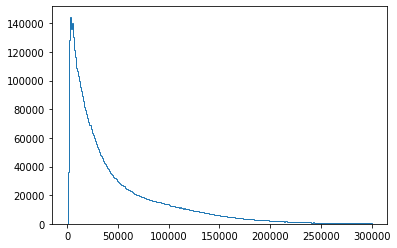

In [15]:
#plotting the total momentum of a daughter particle
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

class Daughter:
  def __init__(self, PX,PY,PZ):
    self.PX=array(PX)#numpy array 
    self.PY=array(PY)
    self.PZ=array(PZ)
    self.PTOT=sqrt(square(self.PX)+square(self.PY)+square(self.PZ))#total momentum of the daughter particle
    self.E=sqrt(square(self.PTOT)+493.677**2)#total energy of the particle


#calculating the total momentum
H1=Daughter(f["DecayTree/H1_PX"].array(library="pd"),f["DecayTree/H1_PY"].array(library="pd"),f["DecayTree/H1_PZ"].array(library="pd"))
H2=Daughter(f["DecayTree/H2_PX"].array(library="pd"),f["DecayTree/H2_PY"].array(library="pd"),f["DecayTree/H2_PZ"].array(library="pd"))
H3=Daughter(f["DecayTree/H3_PX"].array(library="pd"),f["DecayTree/H3_PY"].array(library="pd"),f["DecayTree/H3_PZ"].array(library="pd"))
#plotting the hystogram
plt.hist(H1.PTOT,300,(0,300000),histtype='step'); #the semicolon avoid printing the all array



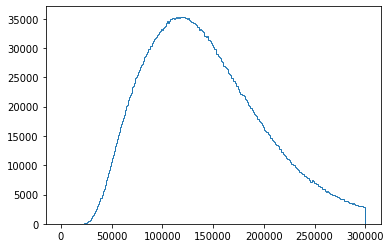

In [16]:
#Calculating the total momentum of the mother 
mother_ptot=sqrt(square(H1.PX+H2.PX+H3.PX)+square(H1.PY+H2.PY+H3.PY)+square(H1.PZ+H2.PZ+H3.PZ))


plt.hist(mother_ptot,300,(0,300000),histtype='step');

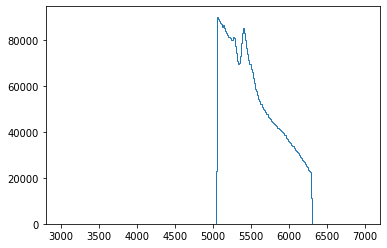

In [17]:
#total mass of the mother
mass_mother=sqrt(square(H1.E+H2.E+H3.E)-square(mother_ptot))

plt.hist(mass_mother,300,(3000,7000),histtype='step');

#Does this match what we would expect from theory?

**ADD HERE EXPLANATION**